# Visualizing the Vietnam Draft

In 1969, 14 years into the Vietnam war, the American government performed the first draft lottery. The lottery was broadcast live on December 1, 1969. A vat was filled with 366 balls, each containing a possible birthdate. Each date was then assigned a number based on the order in which they were drawn. Any eligible man (born between 1944 and 1950) who's birthdate was drawn within the first 195 draws was drafted into military service.

Over the next few years similar drafts were conducted using the same method. However, these lotteries made less drafts. In 1970 men who were born in 1951 and whose birthdate was pulled in the first 125 were drafted. In 1971 men who were born in 1952 and whose birthdate was pulled within the first 95 draws were drafted. In 1972 numbers were drawn in preparation for another draft, however no new drafts were made.

Around the time of the first draft there was controversy that the lottery had not been properly randomized. The vizualizations below demonstrate the trends present in the 1969 draft lottery data that prompted this controversy.

The following data was taken from https://www.randomservices.org/random/data/Draft.html

In [79]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.color_palette('dark')

draft_data = pd.read_csv('draft_data.csv')

Below is a table representation of the data I will be working with. Dates are displayed through seperate month and day columns. Each draft is displayed as follows.

- N69: the 1969 draft lottery
- N70: the 1970 draft lottery
- N71: the 1971 draft lottery
- N72: the 1972 draft lottery

Note that the number represents the order in which the date was drawn. This means the lower the numbers represented dates that were drafted. In 1969 any number under 195 represents a drafted birth date.

In [80]:
display(draft_data)

,Month,Day,N69,N70,N71,N72
0,1,1,305,133,207,150
1,1,2,159,195,225,328
2,1,3,251,336,246,42
3,1,4,215,99,264,28
4,1,5,101,33,265,338
...,...,...,...,...,...,...
361,12,27,78,239,290,194
362,12,28,123,128,174,156
363,12,29,16,145,101,175
364,12,30,3,192,167,281


In [81]:
draft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Month   366 non-null    int64
 1   Day     366 non-null    int64
 2   N69     366 non-null    int64
 3   N70     366 non-null    int64
 4   N71     366 non-null    int64
 5   N72     366 non-null    int64
dtypes: int64(6)
memory usage: 17.3 KB


I am mostly concerned with the 1969 draft so I will create a subset of my dataset with only the month, day and 1969 lottery results. I will also create a subset that contains only drafted dates. Any number over 195 will not be inlcuded.

In [33]:
d1=['Month','Day','N69']
draft1=draft_data[d1]
drafted_only=draft_data[draft_data['N69'] <= 195]
d1_drafted_only=drafted_only[d1]

Here is the full dataset with only month, date and 1969 results:

In [34]:
print(draft1)

     Month  Day  N69
0        1    1  305
1        1    2  159
2        1    3  251
3        1    4  215
4        1    5  101
..     ...  ...  ...
361     12   27   78
362     12   28  123
363     12   29   16
364     12   30    3
365     12   31  100

[366 rows x 3 columns]


And here is the same data but with only drafted numbers included:

In [35]:
print(d1_drafted_only)

     Month  Day  N69
1        1    2  159
4        1    5  101
8        1    9  194
14       1   15   17
15       1   16  121
..     ...  ...  ...
361     12   27   78
362     12   28  123
363     12   29   16
364     12   30    3
365     12   31  100

[195 rows x 3 columns]


I also am curious to see which birhtdates faired best and worst in the draft. The following table shows the top and bottom 5 birth dates. If your birthdate is in the top 5 I'm sorry to say you would have been drafted.

In [36]:
d1_bynum = draft1.sort_values('N69')
print(d1_bynum)

     Month  Day  N69
257      9   14    1
114      4   24    2
364     12   30    3
44       2   14    4
291     10   18    5
..     ...  ...  ...
88       3   29  362
51       2   21  363
125      5    5  364
56       2   26  365
159      6    8  366

[366 rows x 3 columns]


Is your birthday not in the top or bottom five? Try looking it up below to see how you would have fared. The lightest color represents dates that wouldn't have been drafted. If you see any other color, that date was called in the draft. The darker the color, the lower the number. As a December 6th baby myself my odds aren't looking too great.

C:\Users\bdcha\AppData\Local\Temp\ipykernel_22920\3167270283.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  draft_hm1 = draft1.pivot("Day", "Month", 'N69')


<AxesSubplot: xlabel='Month', ylabel='Day'>

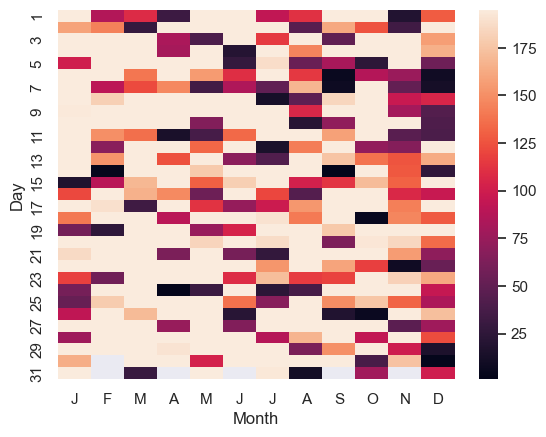

In [86]:
draft_hm1 = draft1.pivot("Day", "Month", 'N69')
sb.heatmap(draft_hm1, xticklabels='JFMAMJJASOND', vmax=195)

You have probably noticed by now that certainly months seem to have had more drafts than others. I will examine this further by creating a count of drafted dates in each month.

In [38]:
by_month = drafted_only.groupby(['Month'])['Month'].count()
print(by_month)


Month
1     14
2     13
3     10
4     12
5     14
6     14
7     18
8     19
9     19
10    14
11    22
12    26
Name: Month, dtype: int64


<AxesSubplot: xlabel='Month', ylabel='count'>

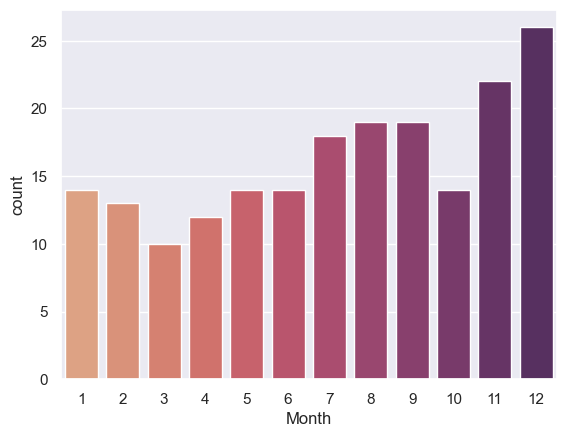

In [72]:
sb.countplot(x=drafted_only['Month'], palette=('flare'))

You can clearly see in the above graphy that dates that fall later in the year tend to have a higher draft count. 22 of a possible 30 dates in November were called to draft, while December contains a staggering 26 out of a possible 31 drafted dates. The below chart shows the percentage of dates in december which were drafted versus those that were not.

In [93]:
pie_data = [26, 5]
pie_labels = ['drafted', 'not drafted']
pie_colors = sb.color_palette('pastel')[0:5]
plt.pie(pie_data, labels = pie_labels, colors = pie_colors, autopct = '%.0f%%')

AttributeError: module 'matplotlib' has no attribute 'pie'

In [47]:
draft70=draft_data[draft_data['N70'] <= 125]

draft71=draft_data[draft_data['N71'] <= 95]

draft72=draft_data[draft_data['N72'] <= 95]

<AxesSubplot: xlabel='Month', ylabel='count'>

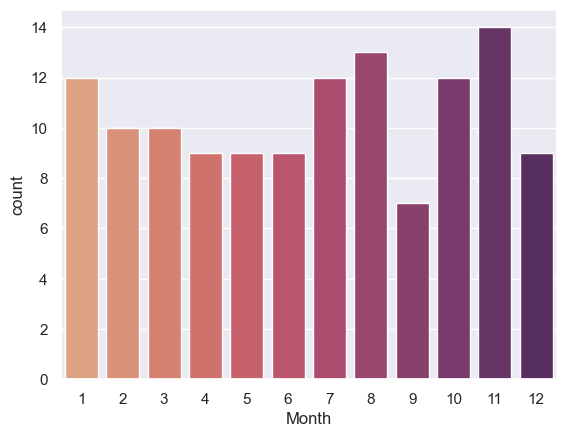

In [76]:
sb.countplot(x=draft70['Month'], palette=('flare'))

<AxesSubplot: xlabel='Month', ylabel='count'>

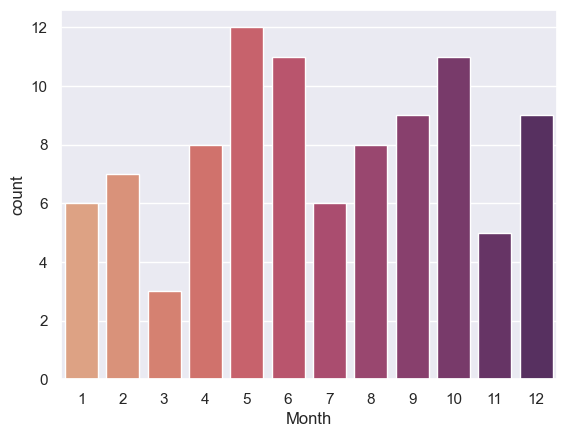

In [77]:
sb.countplot(x=draft71['Month'], palette=('flare'))

<AxesSubplot: xlabel='Month', ylabel='count'>

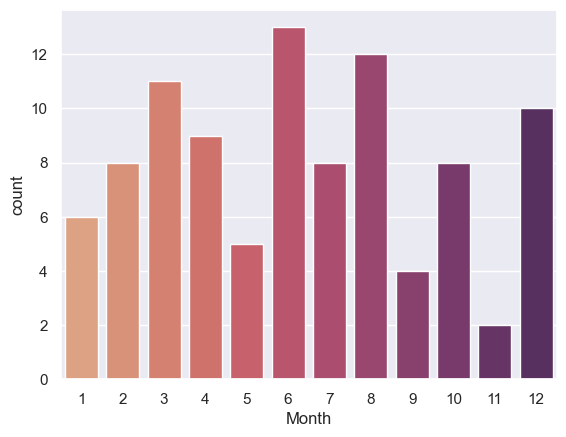

In [78]:
sb.countplot(x=draft72['Month'], palette=('flare'))